### Trying out few CNN filters - just for fun!!

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

def plot( orig_img ):
    plt.imshow(orig_img)
    plt.axis('off')
    plt.show()

def get_image( show = False ):
    orig_img = img.imread('./cat.jpg');
    if show:
        plot(orig_img)
    return orig_img

def apply_filter( image, filtr ):
    (length,height,channel) = image.shape;
    (flength, fheight) = filtr.shape;
    output = np.zeros(image.shape,dtype=int);
    for imH in range(0, height-fheight+1):
        for imL in range(0,length-flength+1):
            #apply the filter : for image portion (imL,imH) to (imL+flength,imH+fheight)
            result = np.zeros((channel));
            for ch in range(channel):
                result = 0.0
                for fl in range(flength):
                    for fh in range(fheight):
                        result += filtr[fl][fh]*image[imL+fl][imH+fh][ch];
                output[imL + (int)(flength/2)][imH + (int)(fheight/2)][ch] = min(max((int)(result),0),255);
    plot(output)

orig_img = get_image(show=True);

<Figure size 640x480 with 1 Axes>

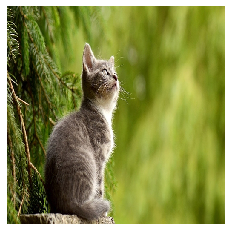

In [2]:
#1. Identity filter
identity_filter = np.array([[0,0,0],[0,1,0],[0,0,0]])
apply_filter( orig_img, identity_filter);

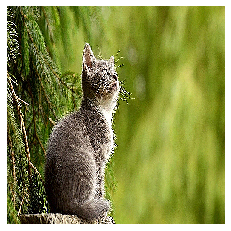

In [3]:
#2. sharpen filter
sharpen_filter= np.array( [[0,-1,0],[-1,5,-1],[0,-1,0]] )
apply_filter( orig_img, sharpen_filter);

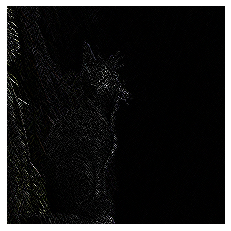

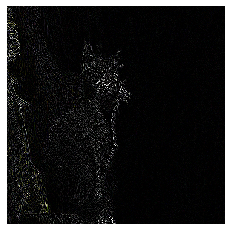

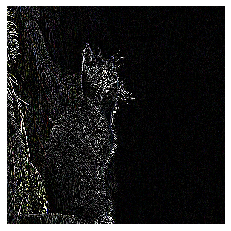

In [4]:
#3. Edge detections
ed_filter_1 = np.array( [[1,0,-1],[0,0,0],[-1,0,1]] )
ed_filter_2 = np.array( [[0,1,0],[1,-4,1],[0,1,0]] )
ed_filter_3 = np.array( [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] )

apply_filter( orig_img, ed_filter_1 )
apply_filter( orig_img, ed_filter_2 )
apply_filter( orig_img, ed_filter_3 )

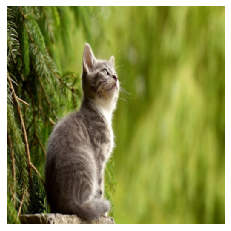

In [5]:
#Box blur
box_blur_filter = np.multiply(1/9, np.array( [[1,1,1],[1,1,1],[1,1,1]] ) )
apply_filter( orig_img, box_blur_filter )

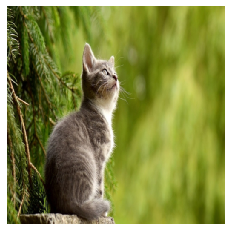

In [6]:
#Gaussian blur ( approximation )
g_blur_filter = np.multiply(1/16, np.array( [[1,2,1],[2,4,2],[1,2,1]] ) )
apply_filter( orig_img, g_blur_filter )